# Chess All GM players Statistics 2023

The dataset contains detailed statistics of all the GM (GrandMaster) titled players in chess.com, with the following columns. 

## Dataset fields:
- name: The name of the chess player
- username: The username of the player in chess.com
- profile: The profile link redirect to chess.com
- user_id: The user id in chess.com
- title: GM (GrandMaster)
- fide: Player's FIDE rating
- In the world of chess, the highest governing body – Federation Internationale des Echecs (FIDE), maintains and updates the rankings of professional chess players based on their performances in registered tournaments.
- country: Player's nation
- followers: Number of followers of the player in chess.com
- joined: The date where the player registered in chess.com
- last_online: Last time the player went online in chess.com
- current_rapid_rating: Current rapid rating of the player
- (Rapid has the same rules as classical but players have between 10 and 60 minutes to make their moves.)
- highest_rapid_rating: Highest rapid rating that the player ever achieved in chess.com
- highest_rapid_date: The date where the player achieved their highest rapid rating in chess.com
- rapid_win: Total number of rapid wins
- rapid_draw: Total number of rapid draws
- rapid_loss: Total number of rapid losses
- current_blitz_rating: Current blitz rating of the player (For games over 3 minutes but under 10 minutes)
- highest_blitz_rating: Highest blitz rating that the player ever achieved in chess.com
- highest_blitz_date: The date where the player achieved their highest blitz rating in chess.com
- blitz_win: Total number of blitz wins
- blitz_draw: Total number of blitz draws
- blitz_loss: Total number of blitz losses
- current_bullet_rating: Current bullet rating of the player (For games under 60 seconds)
- highest_bullet_rating: Highest bullet rating that the player ever achieved in chess.com
- highest_bullet_date: The date where the player achieved their highest bullet rating in chess.com
- bullet_win: Total number of bullet wins
- bullet_draw: Total number of bullet draws
- bullet_loss: Total number of bullet losses
- highest_tactics_rating: The highest rating player achieved on puzzle mode in chess.com
- highest_tactics_date: The date player achieved their highest tactics rating
- highest_puzzle_rating: The highest rating player achieved on puzzle rush mode in chess.com
- is_streamer: Whether the player is a streamer or not
- status: If the player is a premier user or basic user
- league: The league the player is currently in in chess.com (heavily based on frequency of playing games on chess.com)

In [24]:
# import dependencies
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Основные характеристики датасета

In [25]:
df = pd.read_csv('GM_players_statistics.csv')

In [26]:
df.head()

Unnamed: 0                name        username  \
0           0       Komodo Engine     komodochess   
1           1        Vojtěch Plát     vojtechplat   
2           2  PlayMagnus Carlsen      playmagnus   
3           3      Magnus Carlsen   magnuscarlsen   
4           4     Fabiano Caruana  fabianocaruana   

                                       profile   user_id title    fide  \
0     https://www.chess.com/member/KomodoChess  24944922    GM  3411.0   
1     https://www.chess.com/member/VojtechPlat  37712368    GM  2950.0   
2      https://www.chess.com/member/PlayMagnus  19578862    GM  2882.0   
3   https://www.chess.com/member/MagnusCarlsen   3889224    GM  2882.0   
4  https://www.chess.com/member/FabianoCaruana  11177810    GM  2835.0   

          country  followers      joined  ... highest_bullet_date  bullet_win  \
0   United States        494  07/11/2015  ...                 NaN         NaN   
1  Czech Republic        360  11/08/2017  ...          27/09/2021        32.0   
2          Norway        199  05/11/2014  ...                 NaN         NaN   
3          Norway     142482  27/08/2010  ...          28/03/2023       662.0   
4   United States      14445  17/03/2013  ...          30/11/2021       713.0   

   bullet_draw bullet_loss  highest_tactics_rating  highest_tactics_date  \
0          NaN         NaN                     400            07/11/2015   
1          8.0        47.0                    3251            15/09/2021   
2          NaN         NaN                     400            05/11/2014   
3         98.0       246.0                     400            27/08/2010   
4         65.0       203.0                    3519            14/06/2023   

   highest_puzzle_rush_score  is_streamer   status   league  
0                        NaN        False  premium      NaN  
1                       49.0        False  premium   Bronze  
2                        NaN        False  premium      NaN  
3                        NaN        False  premium    Elite  
4                       64.0        False  premium  Crystal  

[5 rows x 35 columns]

In [27]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1508


In [28]:
df.dtypes

Unnamed: 0                     int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

In [29]:
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
name - 267
username - 0
profile - 0
user_id - 0
title - 0
fide - 595
country - 0
followers - 0
joined - 0
last_online - 0
current_rapid_rating - 453
highest_rapid_rating - 511
highest_rapid_date - 511
rapid_win - 453
rapid_draw - 453
rapid_loss - 453
current_blitz_rating - 120
highest_blitz_rating - 126
highest_blitz_date - 126
blitz_win - 120
blitz_draw - 120
blitz_loss - 120
current_bullet_rating - 335
highest_bullet_rating - 364
highest_bullet_date - 364
bullet_win - 335
bullet_draw - 335
bullet_loss - 335
highest_tactics_rating - 0
highest_tactics_date - 0
highest_puzzle_rush_score - 387
is_streamer - 0
status - 0
league - 380


In [30]:
df.describe()

Unnamed: 0       user_id         fide     followers  \
count  1508.000000  1.508000e+03   913.000000  1.508000e+03   
mean    753.500000  4.145837e+07  2002.937568  1.471572e+03   
std     435.466417  4.256272e+07  1061.740709  3.028318e+04   
min       0.000000  3.453000e+03     0.000000  0.000000e+00   
25%     376.750000  1.566528e+07  2405.000000  2.100000e+01   
50%     753.500000  2.930790e+07  2523.000000  9.300000e+01   
75%    1130.250000  5.558539e+07  2600.000000  3.375000e+02   
max    1507.000000  2.994302e+08  3411.000000  1.163963e+06   

       current_rapid_rating  highest_rapid_rating    rapid_win   rapid_draw  \
count           1055.000000            997.000000  1055.000000  1055.000000   
mean            2382.517536           2555.735206    35.672986    12.870142   
std              316.522940            253.590732    89.034619    41.688089   
min              263.000000           1200.000000     0.000000     0.000000   
25%             2306.000000           2470.000000     4.000000     1.000000   
50%             2455.000000           2590.000000    12.000000     4.000000   
75%             2567.500000           2715.000000    31.000000    12.000000   
max             2948.000000           3045.000000  1561.000000  1150.000000   

        rapid_loss  current_blitz_rating  ...     blitz_win   blitz_draw  \
count  1055.000000           1388.000000  ...   1388.000000  1388.000000   
mean     15.783886           2696.157781  ...   1460.873199   272.278098   
std      43.302878            242.827932  ...   2760.901696   463.509412   
min       0.000000            255.000000  ...      0.000000     0.000000   
25%       2.000000           2565.000000  ...    151.000000    23.000000   
50%       6.000000           2725.000000  ...    564.500000   100.500000   
75%      16.000000           2860.250000  ...   1710.500000   334.250000   
max     878.000000           3287.000000  ...  39863.000000  5277.000000   

         blitz_loss  current_bullet_rating  highest_bullet_rating  \
count   1388.000000            1173.000000            1144.000000   
mean    1046.095821            2654.360614            2722.385490   
std     2049.376713             299.828128             329.610058   
min        0.000000            1079.000000             929.000000   
25%       79.000000            2521.000000            2570.750000   
50%      344.000000            2692.000000            2765.000000   
75%     1223.250000            2842.000000            2921.250000   
max    31979.000000            3371.000000            3570.000000   

         bullet_win  bullet_draw   bullet_loss  highest_tactics_rating  \
count   1173.000000  1173.000000   1173.000000             1508.000000   
mean     946.055413    96.741688    649.266837             2494.932361   
std     3070.557355   284.516473   2152.914731             1138.007051   
min        0.000000     0.000000      0.000000              400.000000   
25%       28.000000     2.000000     14.000000             1243.750000   
50%      168.000000    16.000000     94.000000             2851.000000   
75%      692.000000    77.000000    484.000000             3359.000000   
max    58921.000000  4888.000000  37681.000000             6779.000000   

       highest_puzzle_rush_score  
count                1121.000000  
mean                   53.611062  
std                    18.662951  
min                     0.000000  
25%                    43.000000  
50%                    52.000000  
75%                    63.000000  
max                   253.000000  

[8 rows x 21 columns]

# 3. Визуальные исследования

<Axes: xlabel='highest_rapid_rating', ylabel='highest_blitz_rating'>

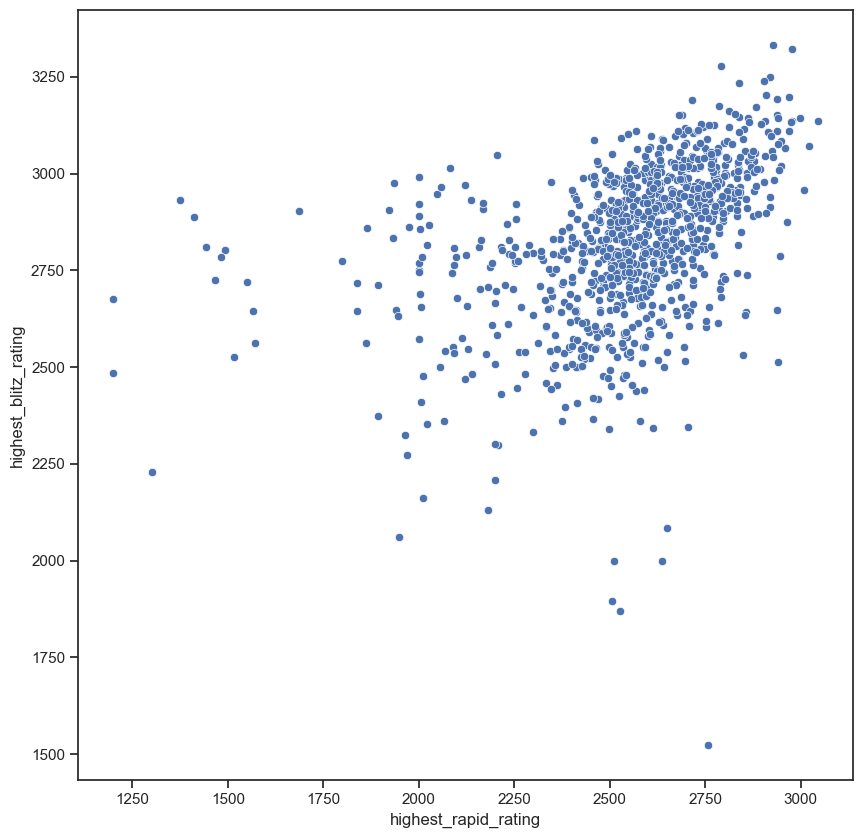

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df)

<Axes: xlabel='highest_rapid_rating', ylabel='highest_blitz_rating'>

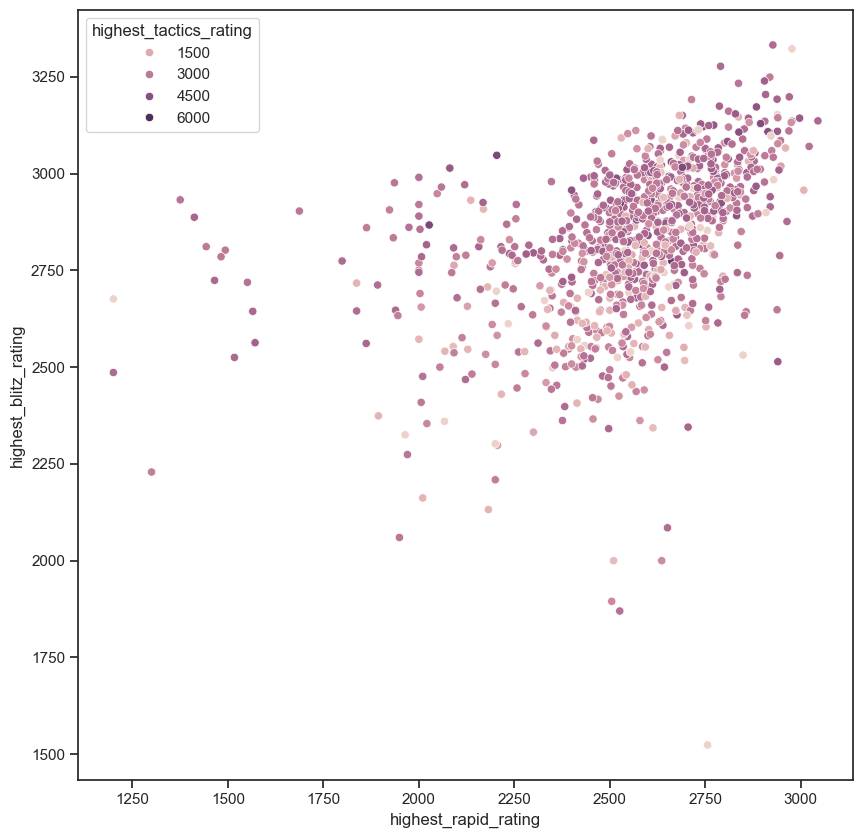

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df, hue='highest_tactics_rating')

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_6456\542991445.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['current_blitz_rating'])


<Axes: xlabel='current_blitz_rating', ylabel='Density'>

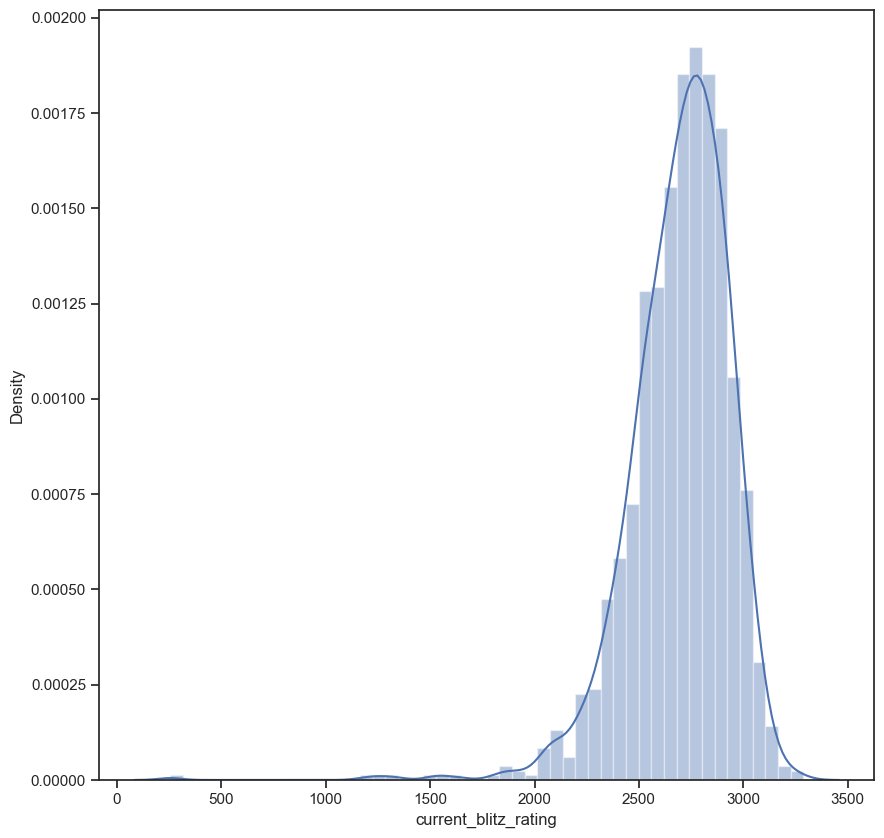

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['current_blitz_rating'])

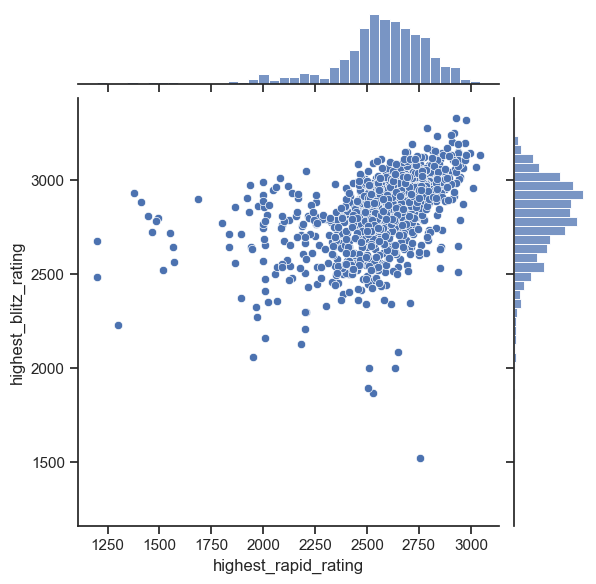

In [34]:
sns.jointplot(x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df)

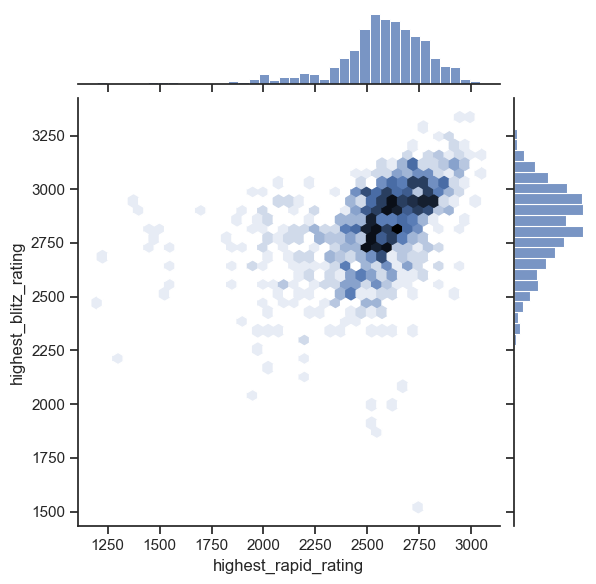

In [35]:
sns.jointplot(x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df, kind='hex')

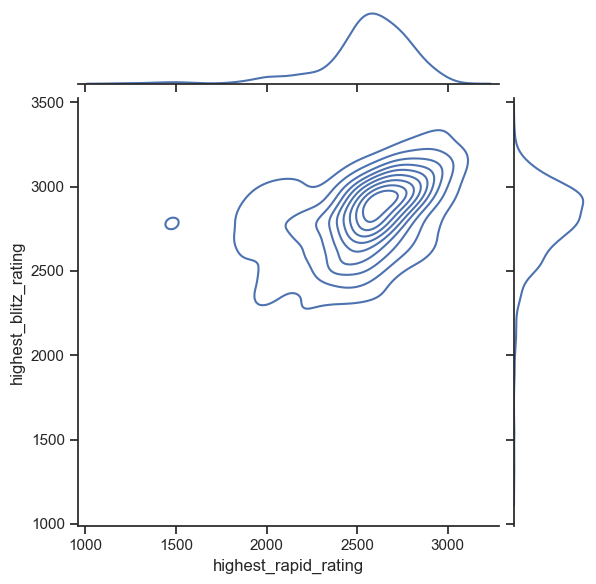

In [36]:
sns.jointplot(x=df['highest_rapid_rating'], y=df['highest_blitz_rating'], data=df, kind='kde')

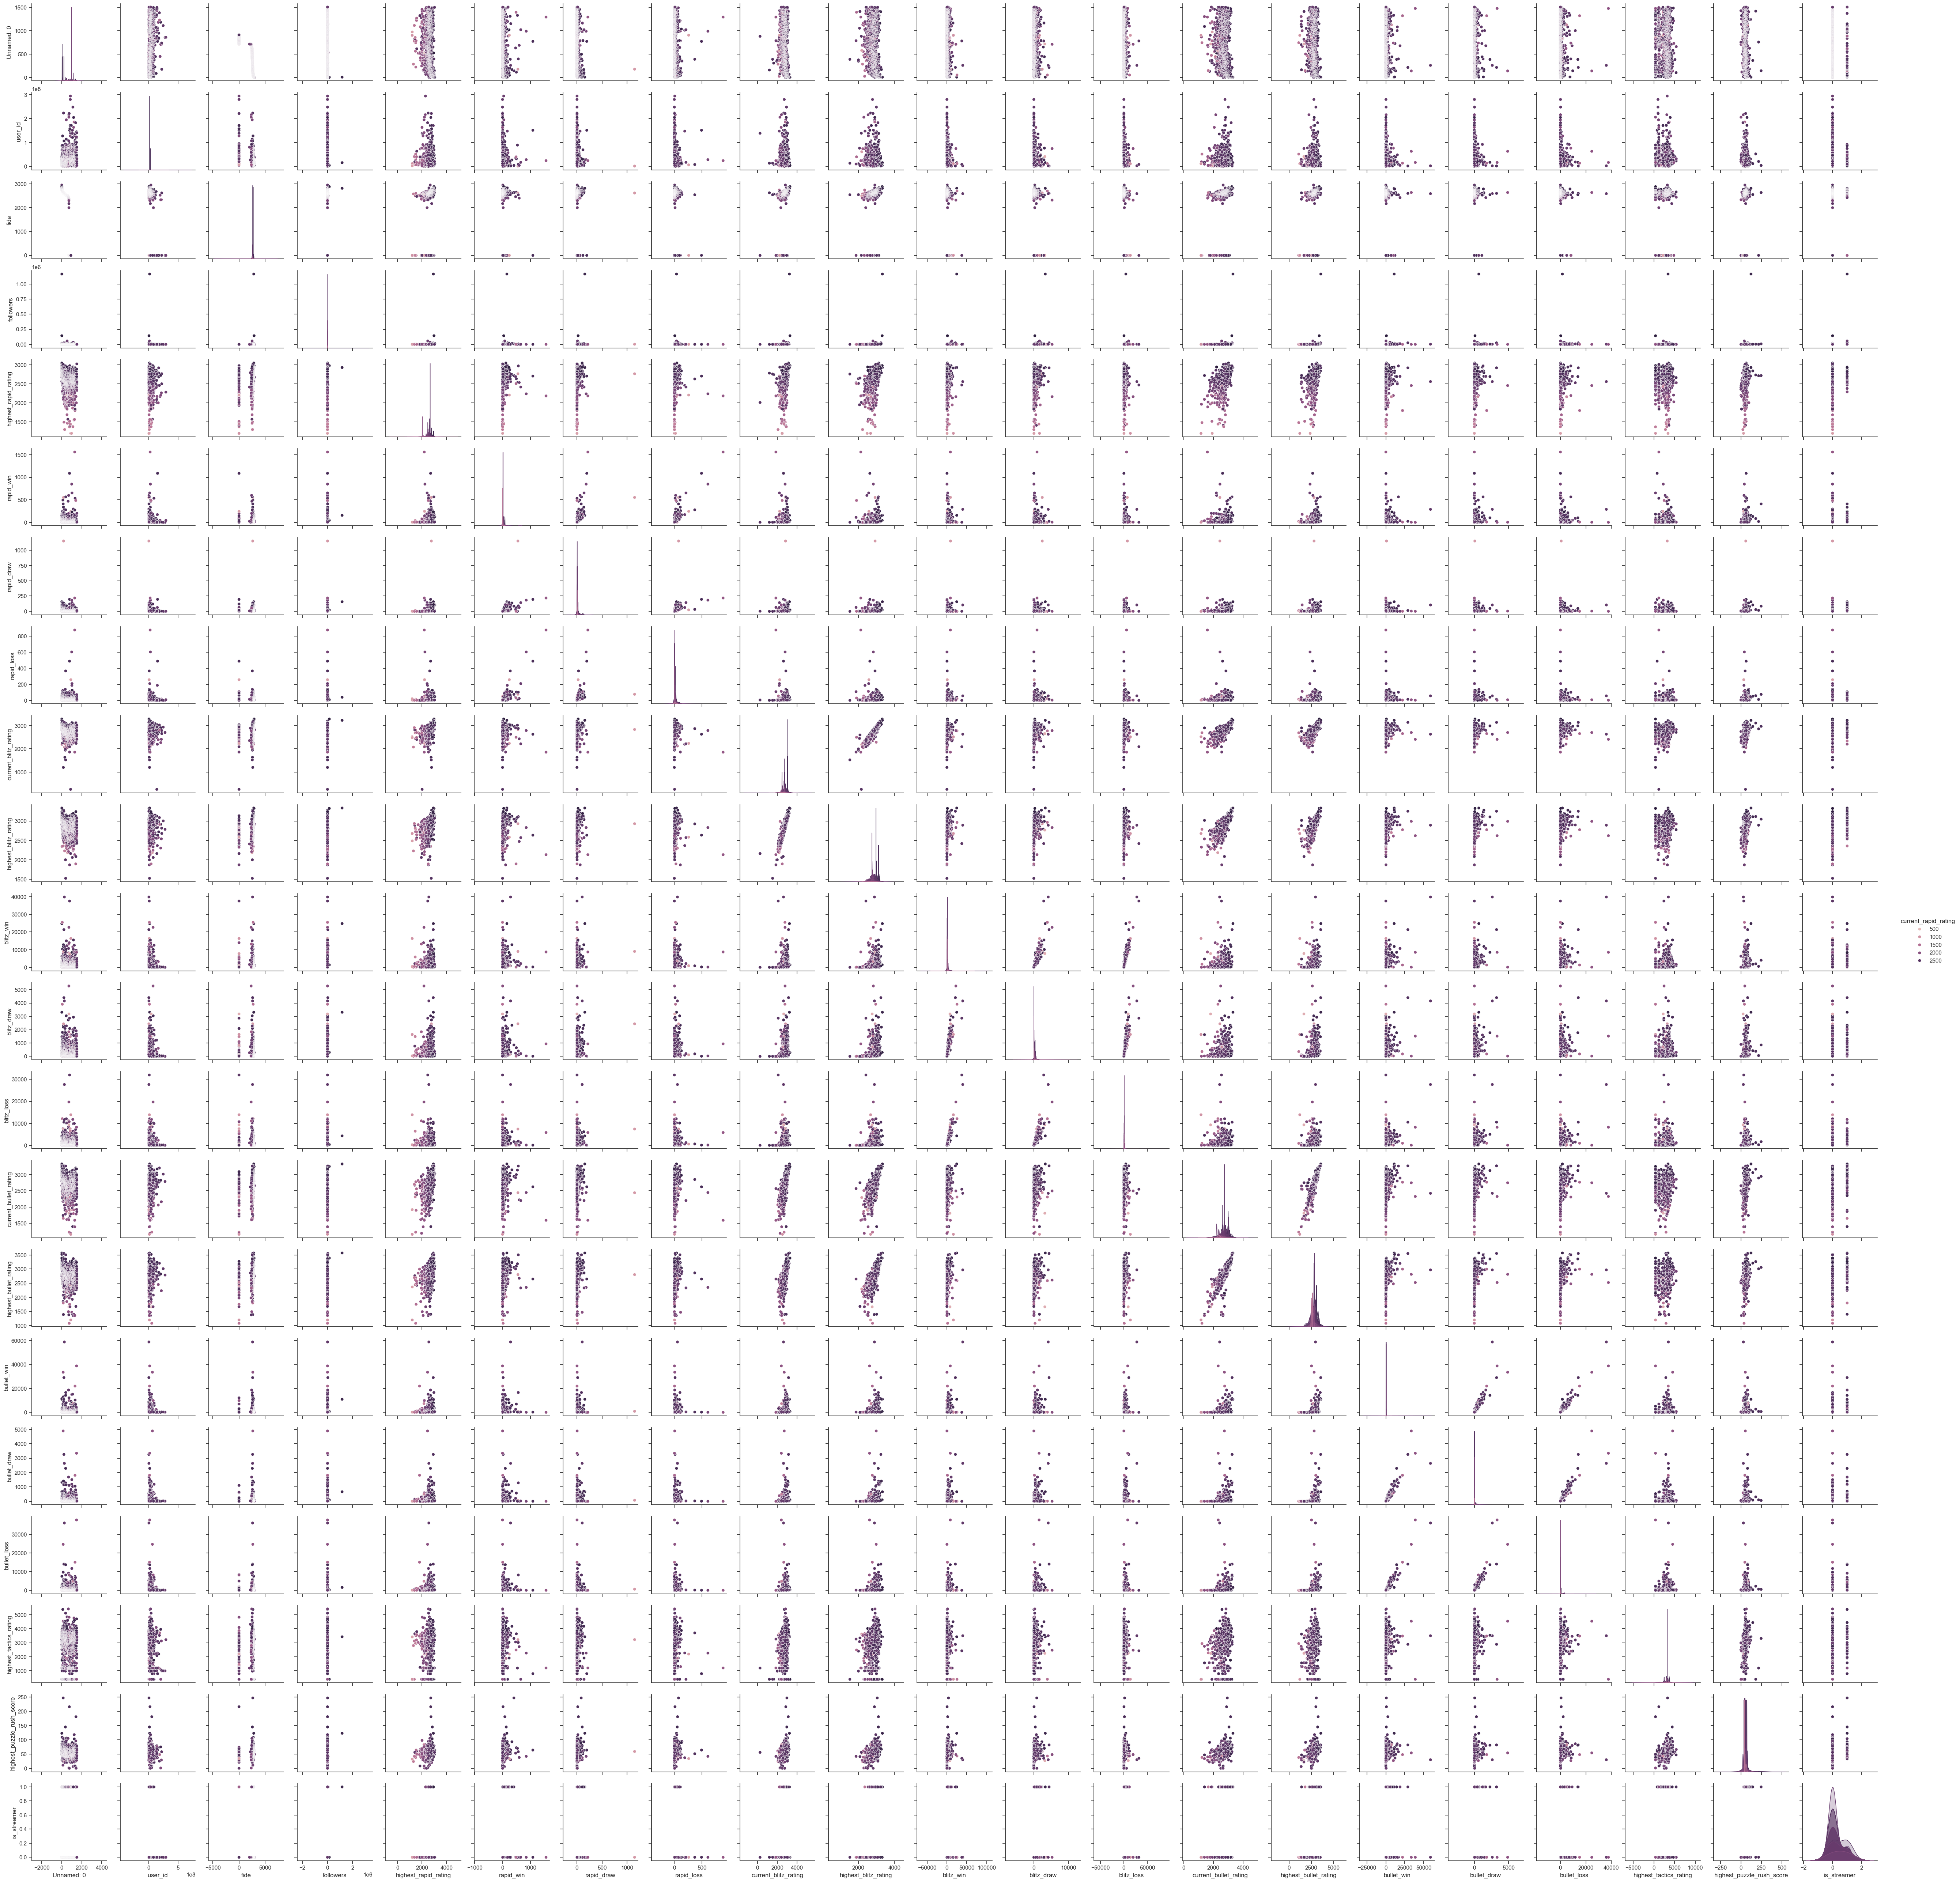

In [37]:
sns.pairplot(df, hue='current_rapid_rating')

<Axes: xlabel='current_blitz_rating'>

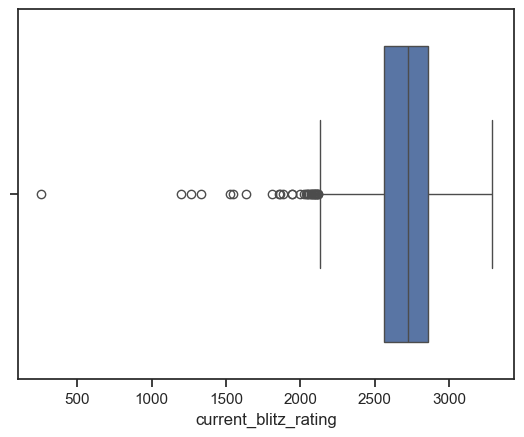

In [38]:
sns.boxplot(x=df['current_blitz_rating'])

<Axes: ylabel='current_blitz_rating'>

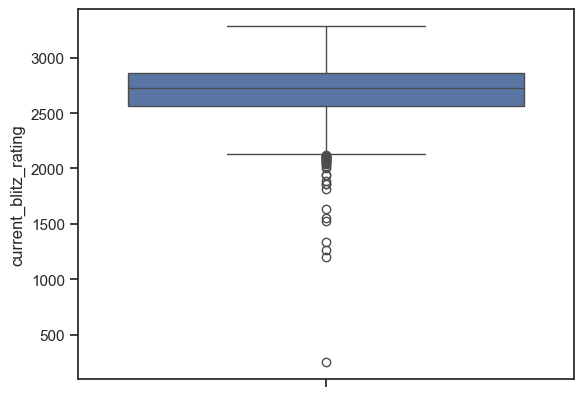

In [39]:
sns.boxplot(y=df['current_blitz_rating'])

<Axes: xlabel='status', ylabel='highest_tactics_rating'>

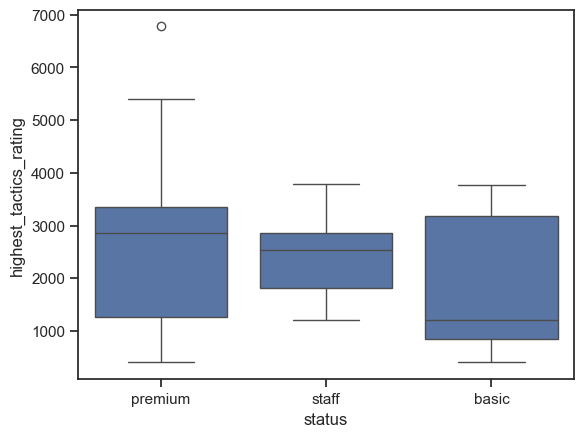

In [40]:
sns.boxplot(y=df['highest_tactics_rating'], x=df['status'], data=df)

<Axes: xlabel='current_rapid_rating'>

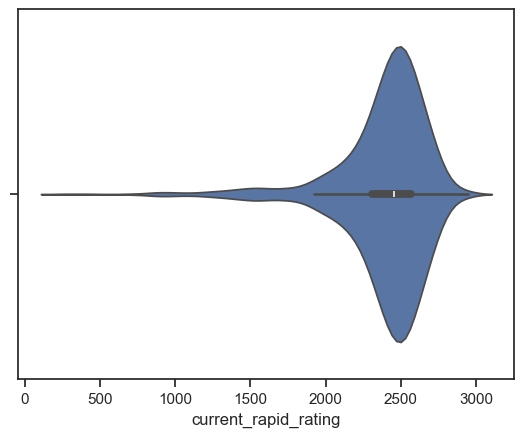

In [41]:
sns.violinplot(x=df['current_rapid_rating'])

C:\Users\Dmitriy\AppData\Local\Temp\ipykernel_6456\3006505357.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['current_rapid_rating'], ax=ax[1])


<Axes: xlabel='current_rapid_rating', ylabel='Density'>

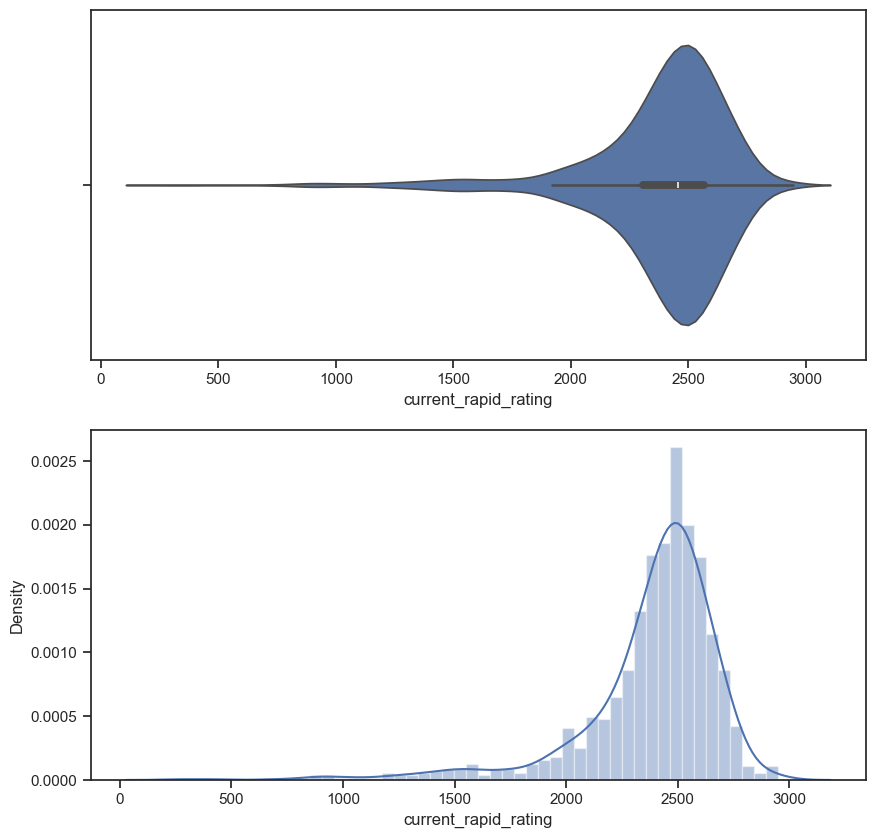

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.violinplot(ax=ax[0], x = df['current_rapid_rating'])
sns.distplot(df['current_rapid_rating'], ax=ax[1])

<Axes: xlabel='status', ylabel='current_bullet_rating'>

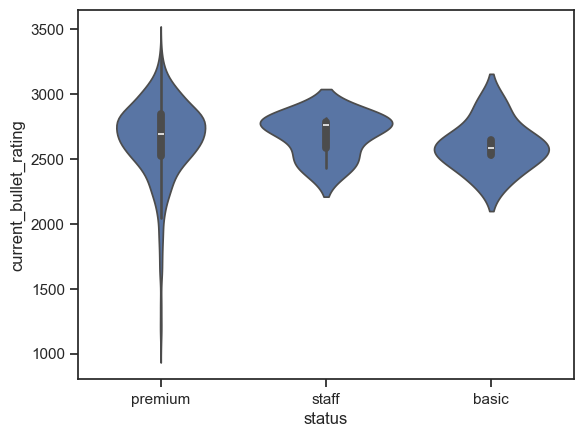

In [43]:
sns.violinplot(x='status', y='current_bullet_rating', data=df)

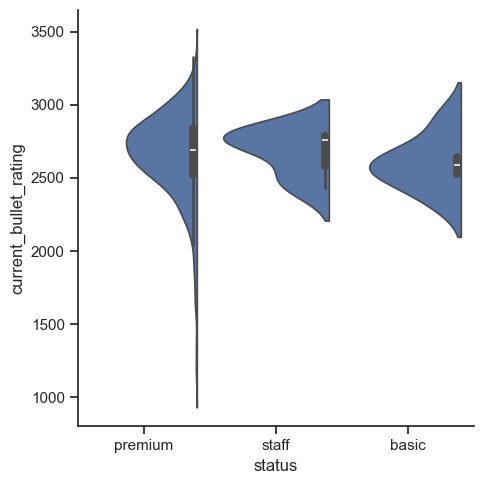

In [44]:
sns.catplot(x='status', y='current_bullet_rating', data=df, kind="violin", split=True)

# Информация о корреляции признаков

In [42]:
df.corr()

ValueError: could not convert string to float: 'Komodo Engine'

In [43]:
df.corr(method='pearson')

ValueError: could not convert string to float: 'Komodo Engine'

In [44]:
df.corr(method='kendall')

ValueError: could not convert string to float: 'Komodo Engine'

In [45]:
df.corr(method='spearman')

ValueError: could not convert string to float: 'Komodo Engine'

In [46]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Komodo Engine'

/tmp/ipykernel_2722/2350136881.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1f')


<Axes: >

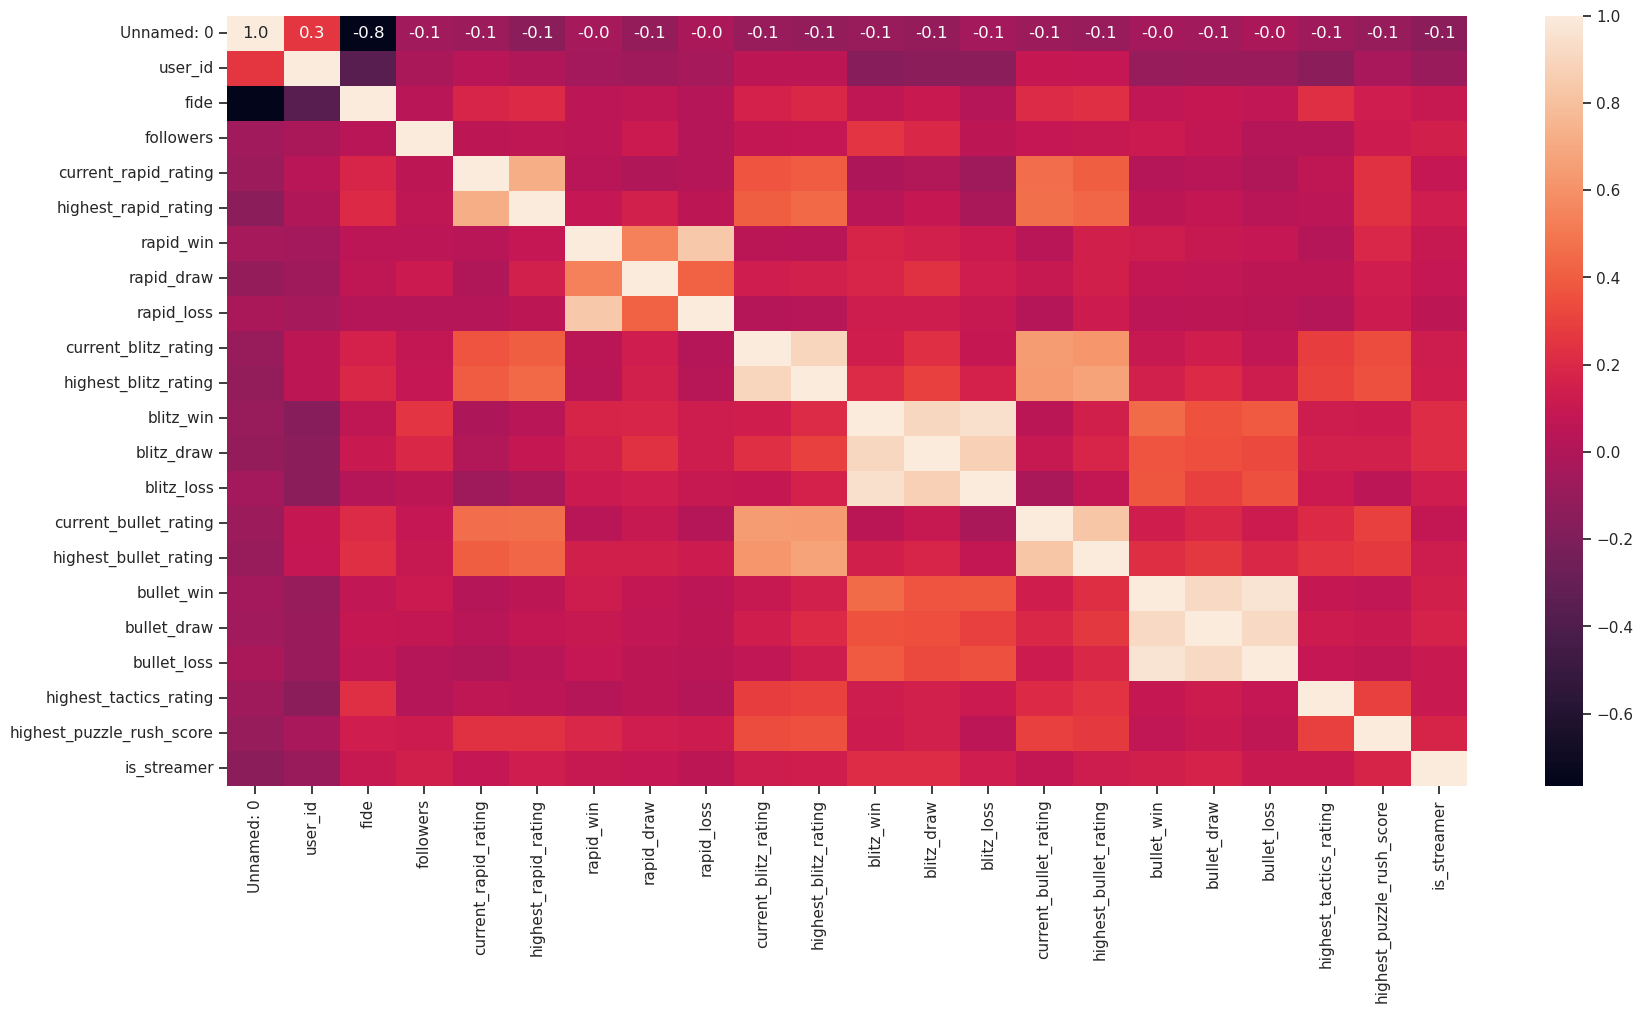

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

/tmp/ipykernel_2722/576802447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f')


<Axes: >

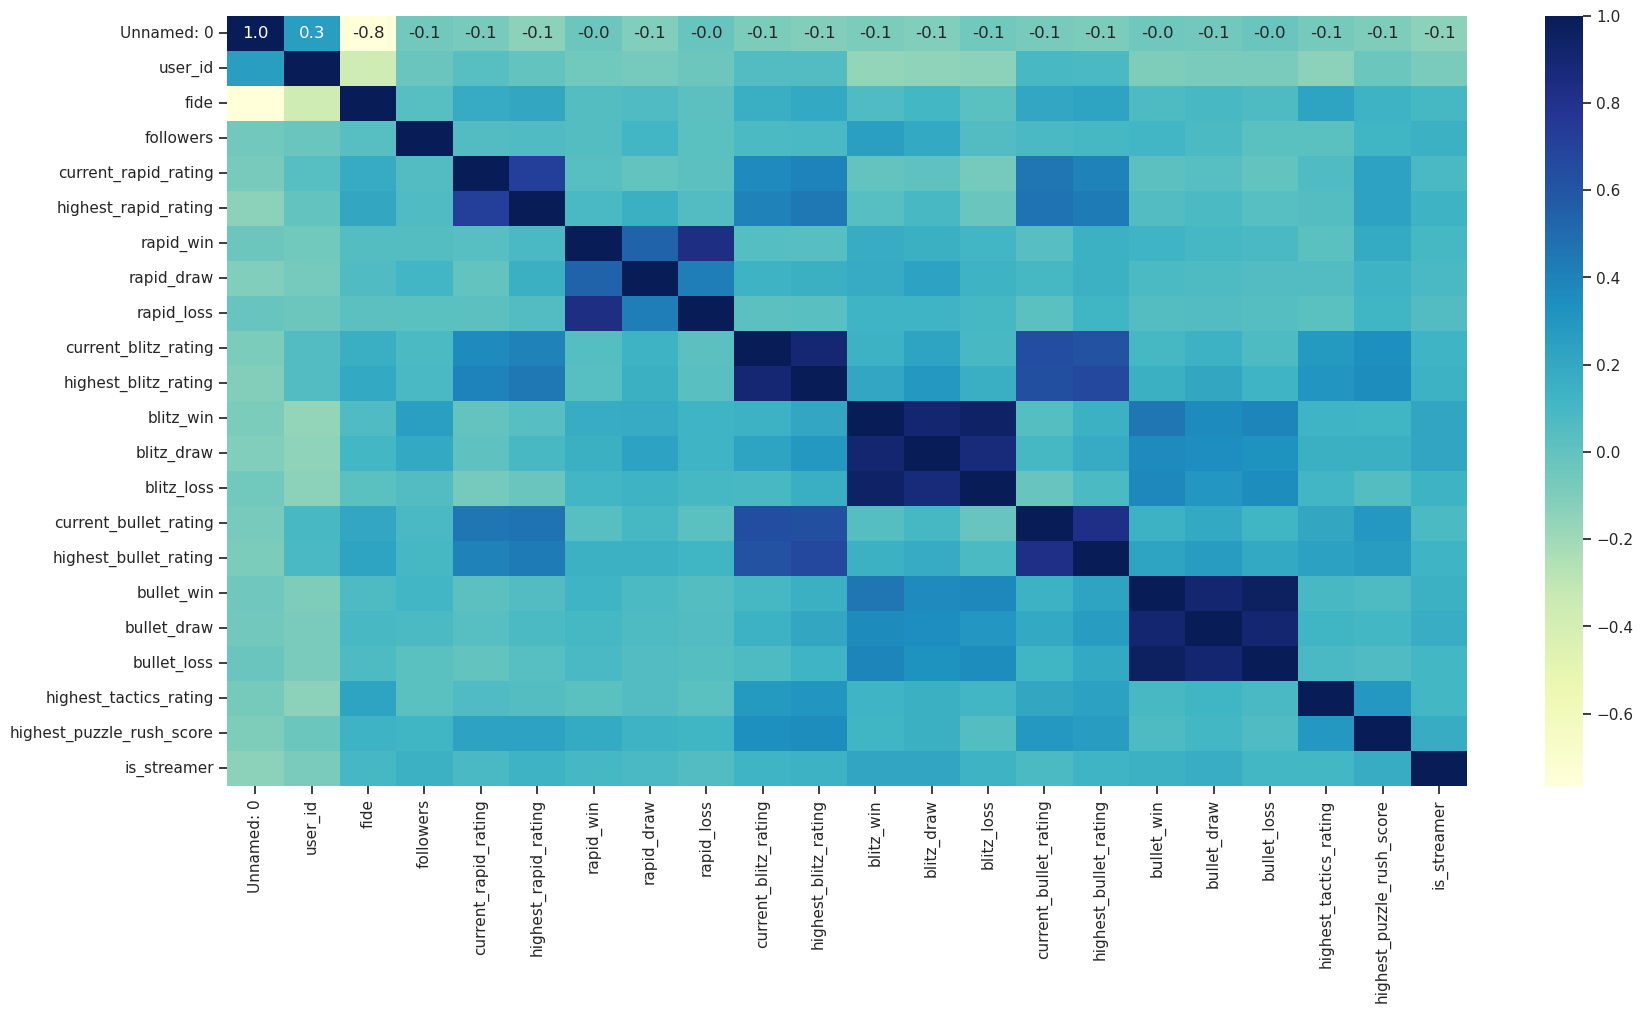

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.1f')

/tmp/ipykernel_2722/972567915.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=bool)
/tmp/ipykernel_2722/972567915.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f')
/usr/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

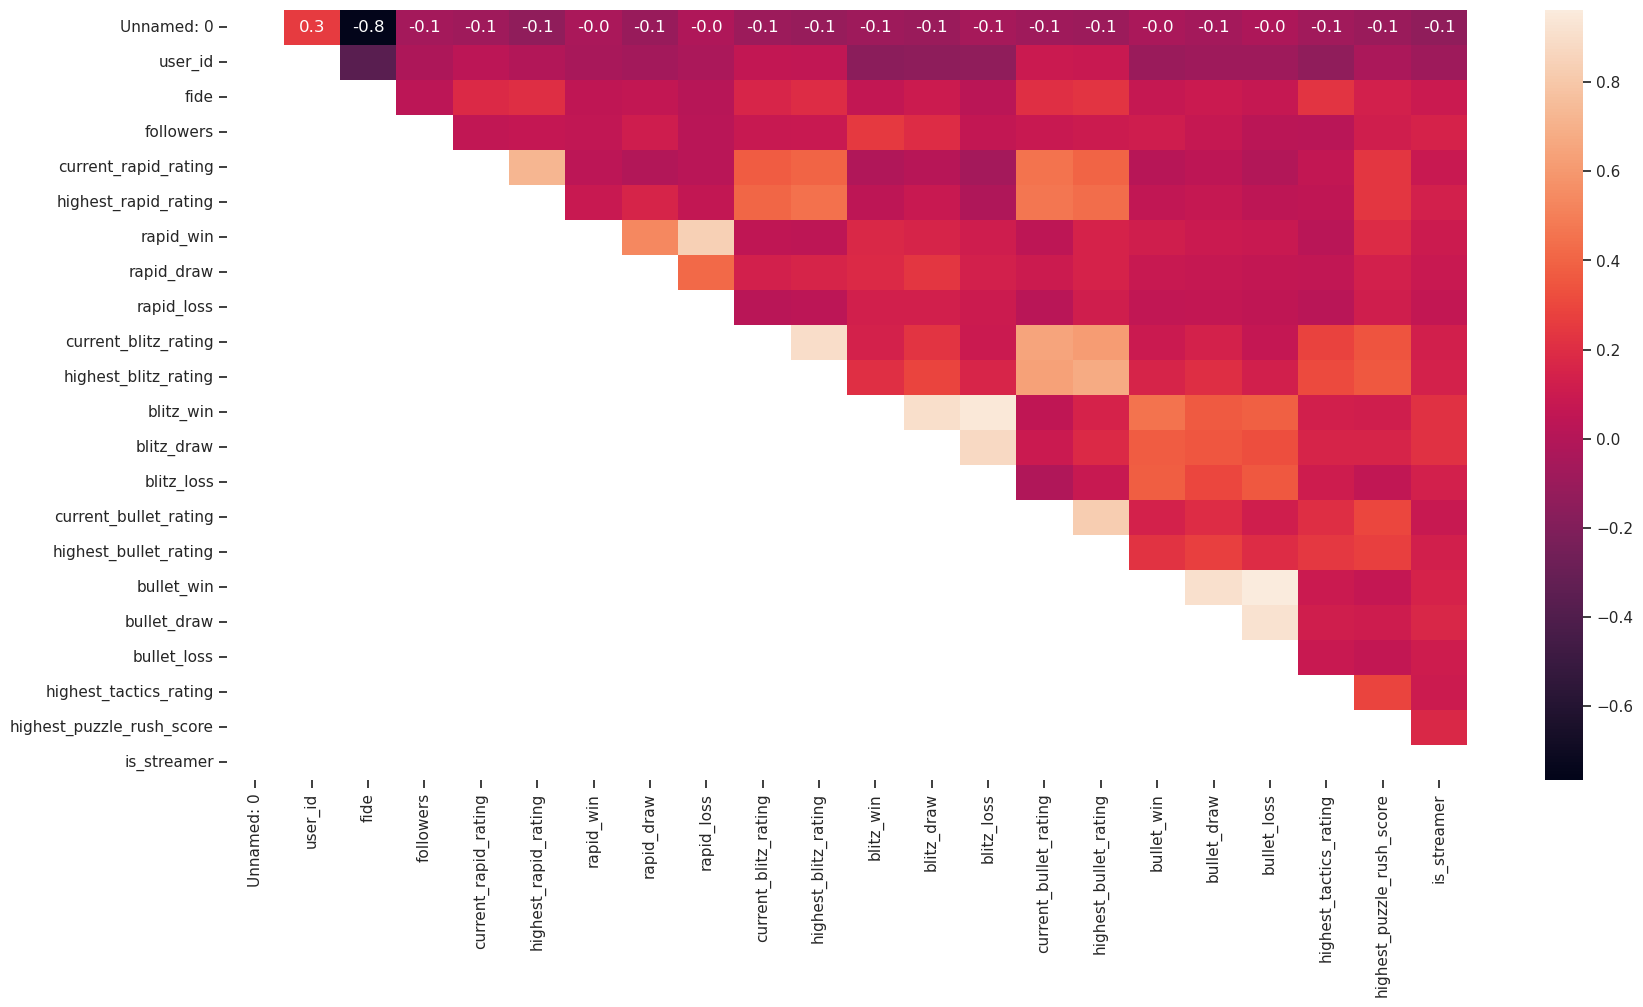

In [ ]:
plt.figure(figsize = (20,10))
mask = np.zeros_like(df.corr(), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f')

/tmp/ipykernel_2722/3059761856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), ax=ax[0][0], annot=True, fmt='.1f')
/tmp/ipykernel_2722/3059761856.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), ax=ax[0][1], annot=True, fmt='.1f')
/tmp/ipykernel_2722/3059761856.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), ax=ax[1][0], annot=True, fmt='.1f')


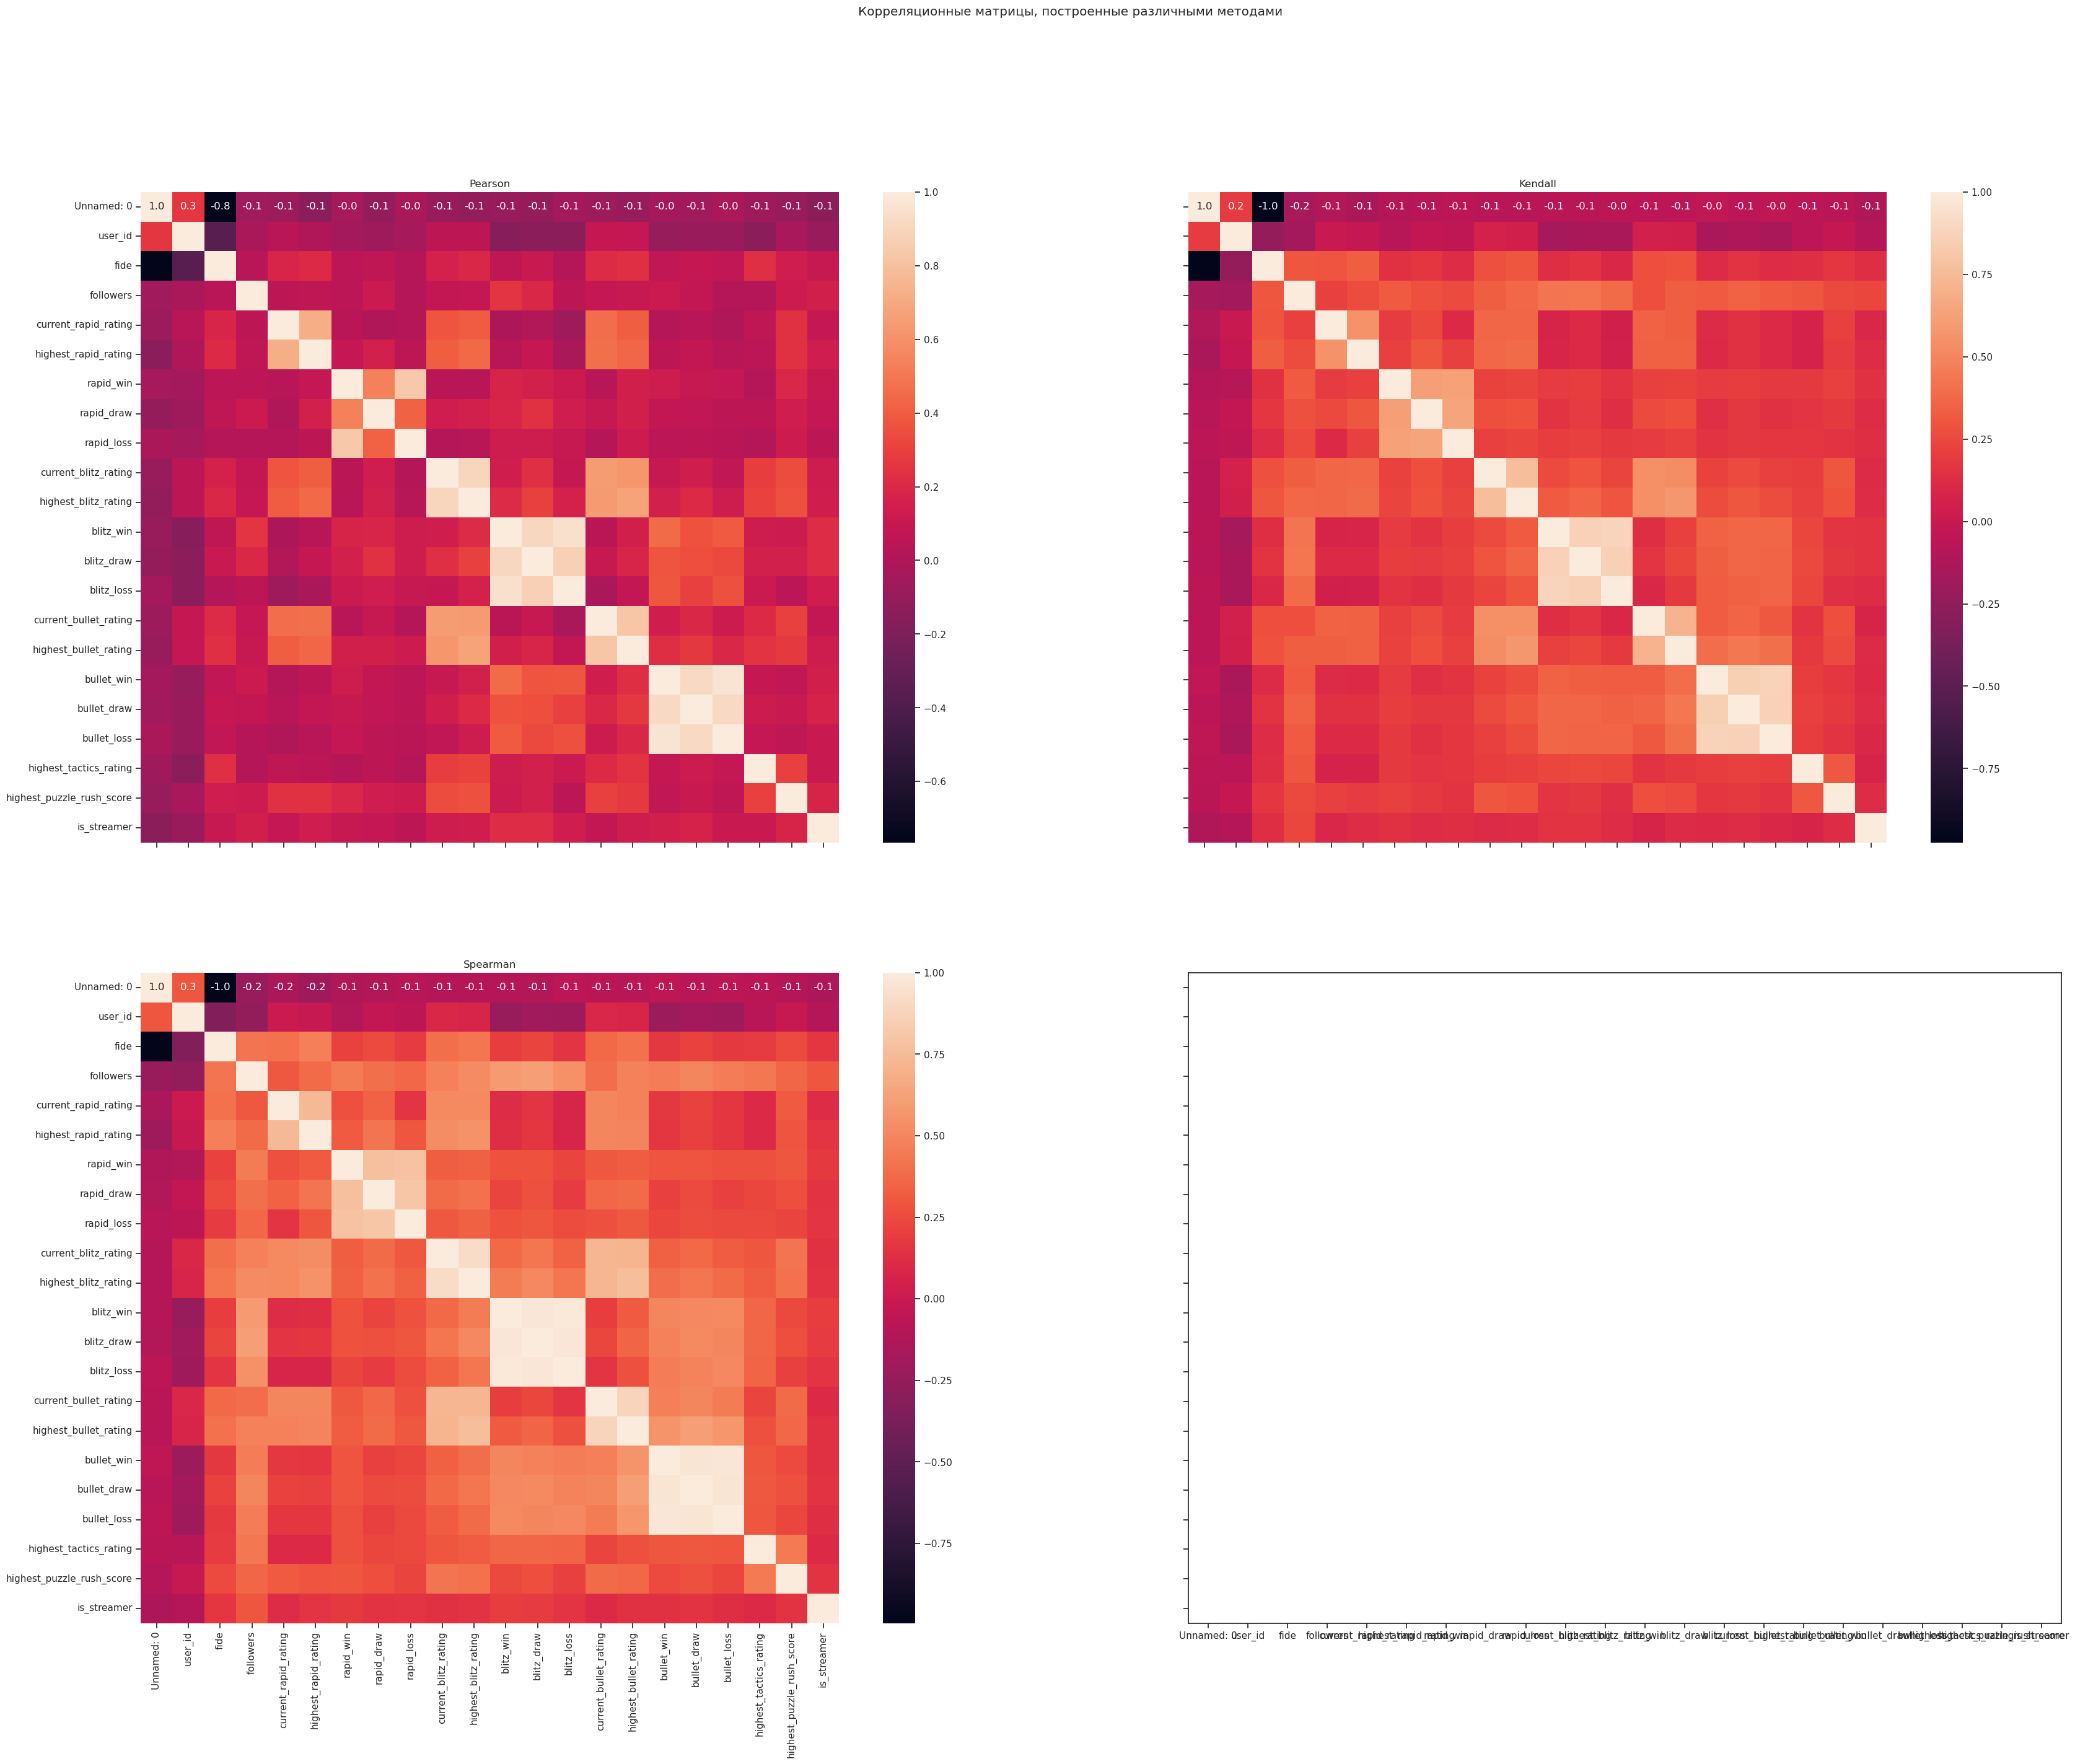

In [ ]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(40,30))
sns.heatmap(df.corr(method='pearson'), ax=ax[0][0], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='kendall'), ax=ax[0][1], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='spearman'), ax=ax[1][0], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0][0].title.set_text('Pearson')
ax[0][1].title.set_text('Kendall')
ax[1][0].title.set_text('Spearman')

/tmp/ipykernel_2722/1157436562.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.1f')


<Axes: >

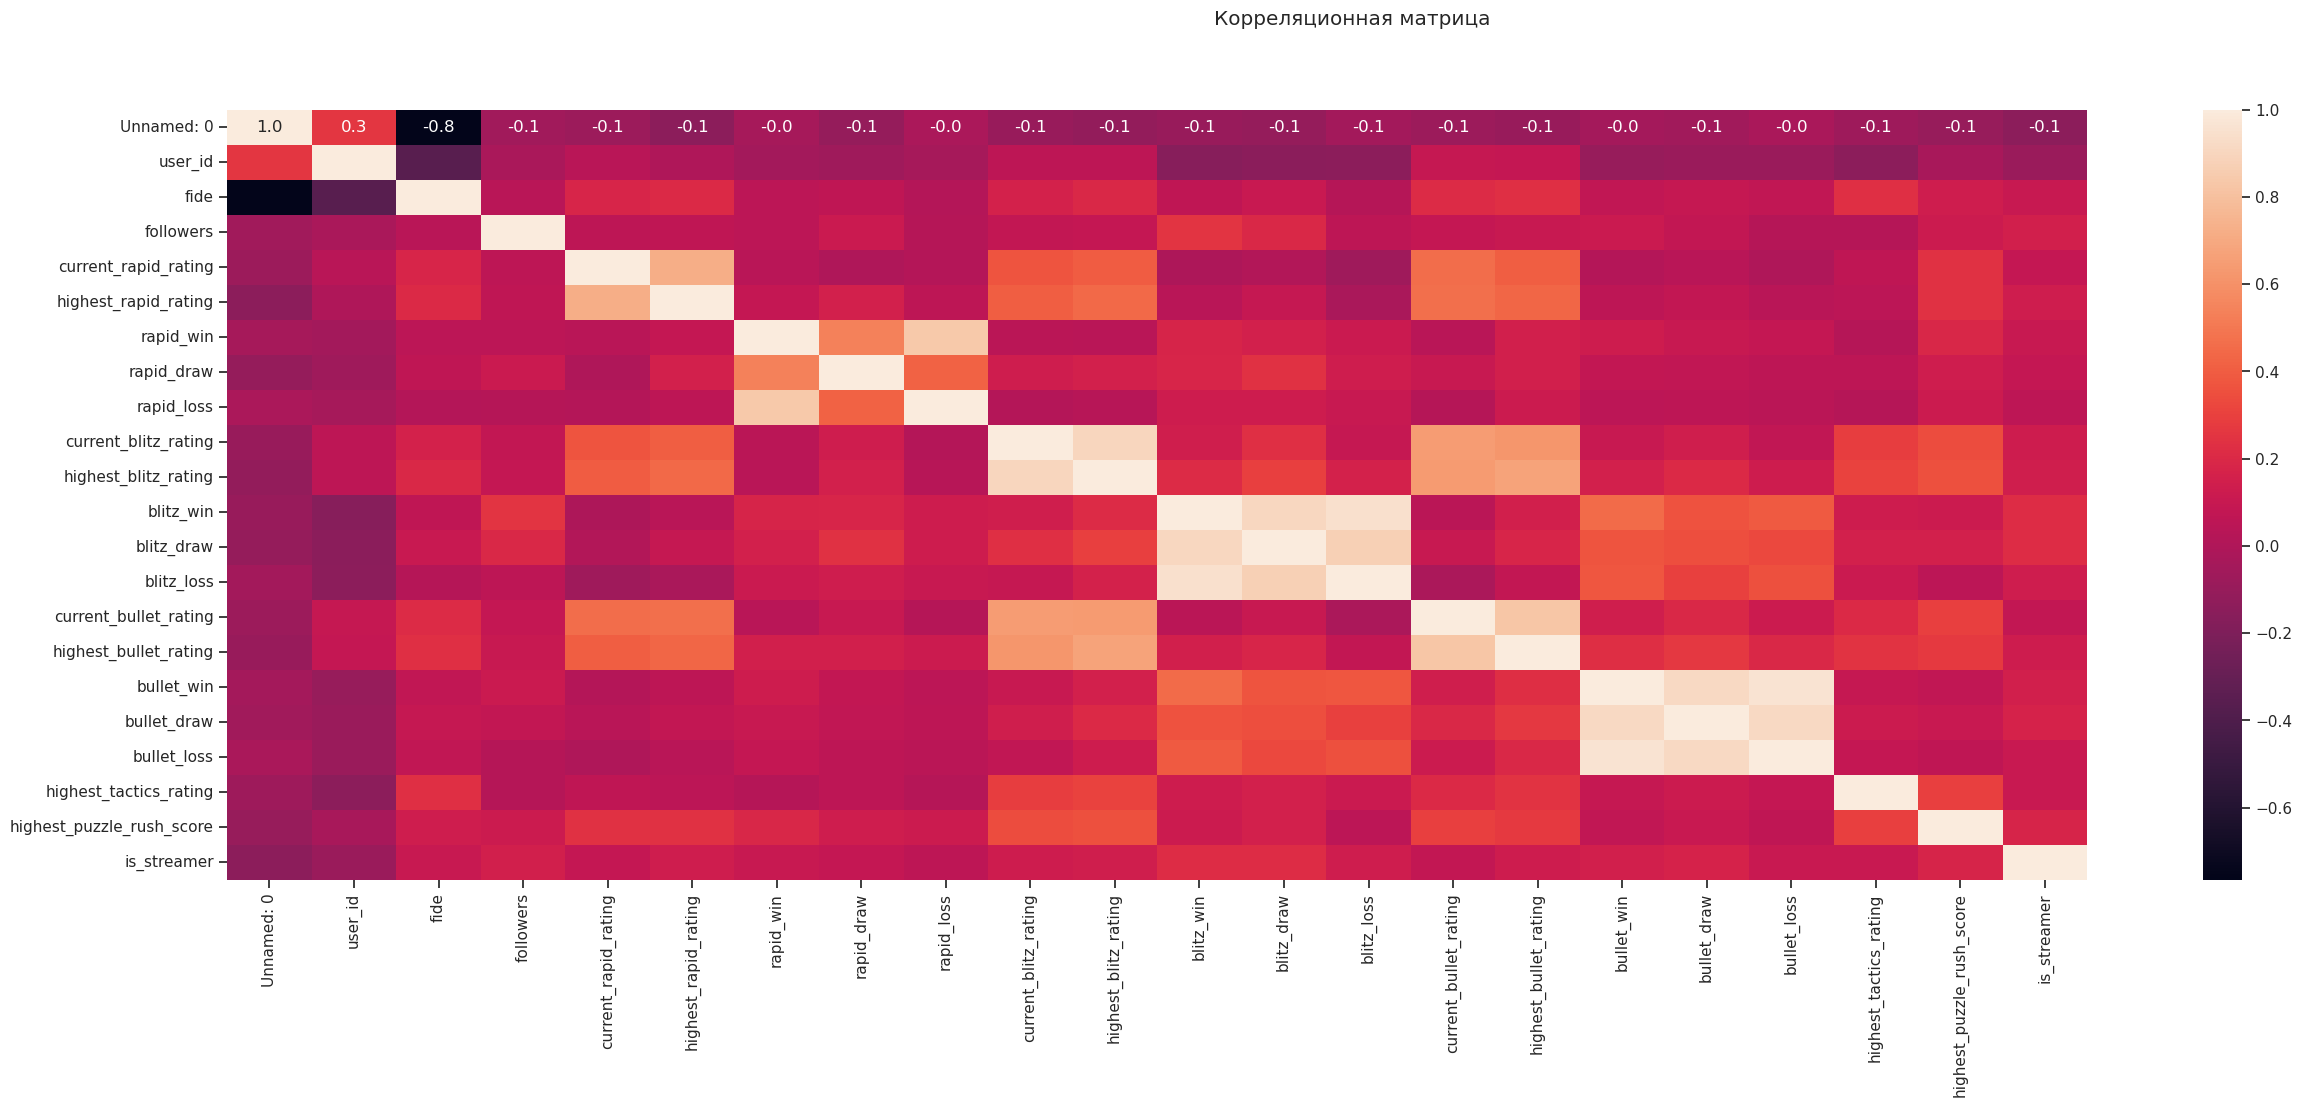

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(30,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.1f')